In [ ]:
!unzip /content/BT-AP-19\ Corpus.zip

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/BT-AP-19 Corpus/TruthFile(Labels).xlsx", sheet_name='Sheet2')

In [ ]:
df_eng = df
df_eng.head()

,Filename,Gender,Age,Qualification,Province,Language,Political Party
0,4,Male,25-34,17-21,Punjab,other,OTHER
1,7,Female,18-24,10-16,Punjab,Urdu,PML (N)
2,8,Male,18-24,10-16,Punjab,English,OTHER
3,9,Male,35-49,10-16,Punjab,Punjabi,PML (N)
4,10,Male,18-24,10-16,Punjab,Punjabi,PTI


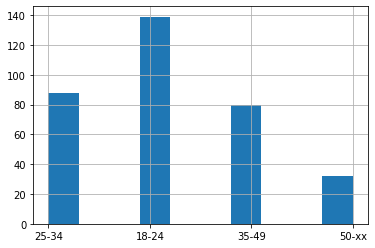

In [ ]:
df_eng['Age'].hist()

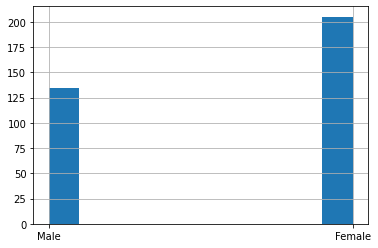

In [ ]:
df_eng['Gender'].hist()

In [ ]:
from tqdm import tqdm_notebook
import os.path

result = []
for i, row in tqdm_notebook(df_eng.iterrows()):
    if not os.path.isfile(f"/content/BT-AP-19 Corpus/Tweets/{row['Filename']:03}.txt"):
        continue
    with open(f"/content/BT-AP-19 Corpus/Tweets/{row['Filename']:03}.txt", 'r') as f:
        tweets = f.read().split('\n')
        for tweet in tweets:
            data = {"post": tweet, "age": row['Age'][:2], "gender": row['Gender'].lower()}
            result.append(data)


len(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


42047

In [ ]:
import random
random.shuffle(result)

In [ ]:
result[:10]

[{'age': '50',
  'gender': 'female',
  'post': 'Umar Murtaza: Head of SM Operation'},
 {'age': '35',
  'gender': 'female',
  'post': 'Aik Din Nawaz Sharif ke Saath by  username http://t.co/sRLnVdlaoD'},
 {'age': '18', 'gender': 'male', 'post': ' Pakchinafriendship '},
 {'age': '35',
  'gender': 'female',
  'post': '😂😂😂😂  TooFunny  Karachi https://t.co/gBjCYjEGxe'},
 {'age': '35',
  'gender': 'female',
  'post': 'Wishing him a speedy recovery, hope he wil b back to his usual self again soon  RahseedGodil opened his eyes and said "Thank God,I am alive"'},
 {'age': '25',
  'gender': 'female',
  'post': "Been doing interviews for over a decade- wouldn't have been able to handle myself with the intellectual finesse & patience! username  CNN"},
 {'age': '18',
  'gender': 'male',
  'post': 'great war madrid vs manu/\\ m excited te see,,,:)'},
 {'age': '25',
  'gender': 'female',
  'post': 'username username_Urdu username well I ll read that :-)'},
 {'age': '18',
  'gender': 'male',
  'post': 

In [ ]:
train, test = result[:int(len(result)*0.8)], result[int(len(result)*0.8):]
len(train), len(test)

(33637, 8410)

In [ ]:
import json

with open('train.json', 'w', encoding='utf-8') as f:
    json.dump(train, f, ensure_ascii=False)

with open('test.json', 'w', encoding='utf-8') as f:
    json.dump(test, f, ensure_ascii=False)